Sub-Topics

1. Linear Model for classification
2. Logistic Regression
3. Understanding decision boundary
4. Implement Logistic Regression
5. Loss Function

In [ ]:
# Bias and Variance
# Regularization
# Bias & Variance Trade off
# lasso regression

In [ ]:
# data collection
# data wranggling
# featrue Eng
            # train , test
#          model building
#          accuracy(training, testing)[[]]
# DC

In [ ]:
#Training             Testing
#Linear Model

# 80%(High variance)      # 30%(Low Bias) (overfitting)# bias and variance (Error)
# 40%(Low variance)      # 90%(High Bias) ( Underfitting)

In [ ]:
# what is bias variance trade off:( Low Trining Error and Low Testing Error)

In [ ]:
# Reguralazation

In [ ]:
# what is overfitting?.
# Ans:
#    overfitting - My model is working very well in  training data but it's not performing well in testing data.it's also called
#(High variance)

In [ ]:
# what is underfitting?.
# Ans:
#    overfitting - My model is not working very well in  training data but it's performing well in testing data.it's also called
#(High bias)

In [ ]:
# L1 - Lasso Regression
# L2 - Ridge Regression

`Low variance and Low Bias is balanced
and
High variance and High Bias is imbalanced`

In [1]:
import pandas  as pd
import numpy as np
df = pd.read_csv(r"D:\Data Science\MACHINE LEARNING\auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [3]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [4]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [6]:
df[df['horsepower']=='?']  # we did filter for '?' values

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [7]:
df.shape

(398, 9)

In [8]:
df = df.replace('?', np.nan)  # here we are replacing '?' through the 'nan'

In [9]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
df.drop(['car name'], axis=1, inplace=True)

In [11]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [13]:
# it's not correct way to convert string to numeric type to do machine learning model
# he didn't have time to do that so he followed this method.
df = df.apply(lambda x: x.fillna(x.median()))  # here we used 'median' because string won't work in mean.
                                              # 'median' can work 'alphanumeric' and 'mean' can work with only 'numeric' type data.

In [14]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [15]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [16]:
X = df.drop('mpg', axis = 1)
y = df[['mpg']]

In [17]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

D:\Data Science\edyodha packages\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Data Science\edyodha packages\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Data Science\edyodha packages\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

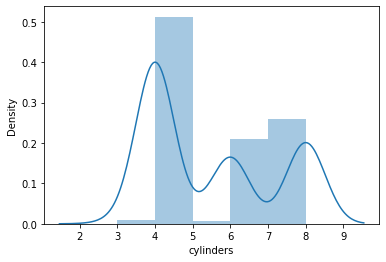

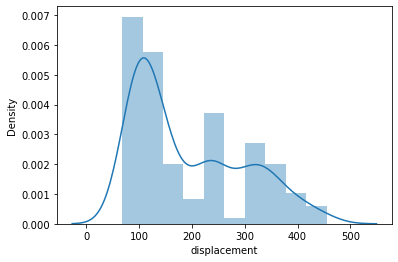

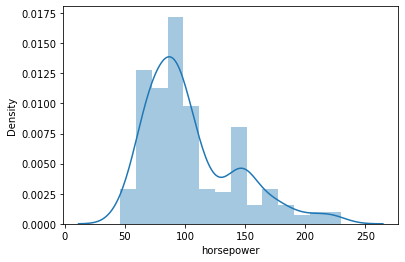

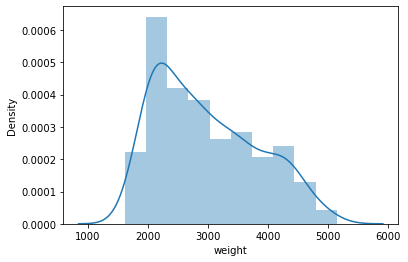

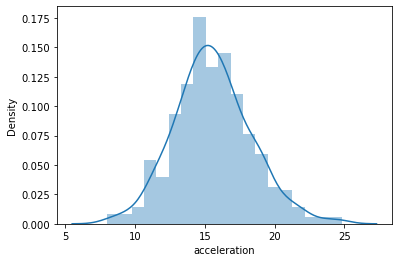

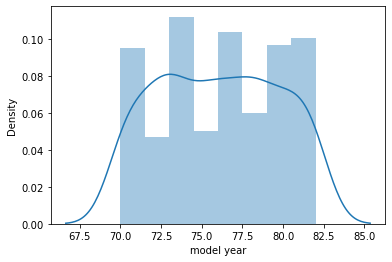

In [18]:
a = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year']
import matplotlib.pyplot as plt
import seaborn as sns
for i in a:
  plt.figure()
  sns.distplot(X[i])

D:\Data Science\edyodha packages\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

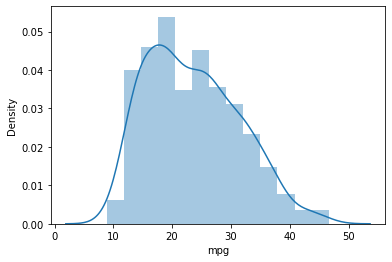

In [19]:
sns.distplot(y['mpg'])

In [27]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

In [28]:
X_scaled # it has converted all values into array by automatically and it is scalled those values.
         # previously data was in normal format after we used scale function it's converted to array.

array([[ 1.49819126,  1.0906037 ,  0.67311762, ..., -1.29549834,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.5035143 ,  1.58995818, ..., -1.47703779,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.19623199,  1.19702651, ..., -1.65857724,
        -1.62742629, -0.71514478],
       ...,
       [-0.85632057, -0.56103873, -0.53187283, ..., -1.4407299 ,
         1.62198339, -0.71514478],
       [-0.85632057, -0.70507731, -0.66285006, ...,  1.10082237,
         1.62198339, -0.71514478],
       [-0.85632057, -0.71467988, -0.58426372, ...,  1.39128549,
         1.62198339, -0.71514478]])

In [33]:
X_scaled= pd.DataFrame(X_scaled, columns = X.columns)
X_scaled

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,-0.715145
394,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.533222
395,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,-0.715145
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,-0.715145


In [39]:
y_scaled = preprocessing.scale(y)
y_scaled= pd.DataFrame(y_scaled, columns = y.columns)

y_scaled

,mpg
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543
...,...
393,0.446497
394,2.624265
395,1.087017
396,0.574601


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.30, random_state = 0)

In [35]:
X_train.shape

(278, 7)

In [36]:
X_test.shape

(120, 7)

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
LinearRegression()

LinearRegression()